In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Speficy some plotting properties
from matplotlib import rc, rcParams
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['mathtext.rm'] = 'serif'

plt.rcParams["ytick.right"] = True
plt.rcParams["xtick.top"] = True
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"

rad2deg = 180./np.pi

This notebook plots the results of a population synthesis of hot Jupiter formation in stellar binaries, as explored in Anderson et al. 2016. We have used the scripts in the `run_in_batch` directory to perform a large number (~8000) of simulations (see the example shown in the notebook `migrating_planet_example.ipynb` for an example of running a single simulation). We have fixed the masses of both stars to 1 solar mass, and the planet mass to 5 Jupiter masses. We set the initial orbit of the planet to be nearly circular, as expected by theories of planet formation. 

We have sampled the initial properties of the orbits over a wide range of values motivated by planet formation theory and observations of stellar binaries: 
- the semi-major axis of the planet uniformly in the range (1 - 5)AU.
- the semi-major axis of the binary star orbit uniformly in the range (100 - 1000)AU.
- the eccentricity of the binary orbit uniformly in the range 0 - 0.9.
- the mutual inclination between the orbits uniformly in cosine of the inclination (isotropically).
- the longitudes of ascending node and argument of pericenters uniformly in the range 0 - 2 pi.

We then integrated the ODEs for a total of 5 billion years, and recorded the orbital properties at this time, along with the initial conditions. The simulation results are stored in `population_synthesis.csv`.

First we read in the simulation data from the file and store in a dataframe:

In [2]:
df = pd.read_csv("population_synthesis.csv")

Next we separate the data based on the migration outcome, as indicated by the `sflag` column. The value `HJ` indicates that the simulation resulted in inward migration of the planet, so that a hot Jupiter was formed (with a final semi-major axis less than 0.1 AU). `NM` indicates that the planet did not undergo migration within the simulated time. `TD` indicates that the eccentricity of planet got so high that it passed too close to the star and was destroyed by tidal forces. And finally, `MG` indicates that the planet was currently in the process of migrating inward at the end of the simulation. Given enough time, these migrating planets would eventually become hot Jupiters.

We print the number of planets in each category. Non-migrating planets are by far the most common outcome, followed by tidally-destroyed planets. Successful hot Jupiter formation is relatively rare, and planets caught in the act of migration are even more rare.

In [3]:
df_hj = df[df["sflag"] == "HJ"]
df_nm = df[df["sflag"] == "NM"]
df_td = df[df["sflag"] == "TD"]
df_mg = df[df["sflag"] == "MG"]

print("Number of non-migrating planets: ",len(df_nm.index.values))
print("Number of tidally-disrupted planets: ",len(df_td.index.values))
print("Number of fully migrated planets (hot Jupiters): ",len(df_hj.index.values))
print("Number of planets in the process of migrating: ",len(df_mg.index.values))


Number of non-migrating planets:  5232
Number of tidally-disrupted planets:  432
Number of fully migrated planets (hot Jupiters):  110
Number of planets in the process of migrating:  7


Below we plot the distribution of final semi-major axes of the hot Jupiters.

Text(0, 0.5, 'Number of planets')

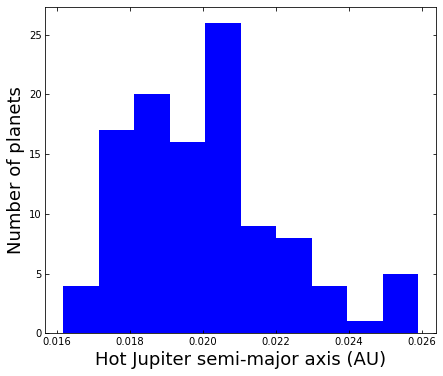

In [4]:
fs = 18
plt.figure(1,figsize=(7,6))
plt.hist(df_hj["a1"].values*(1-df_hj["e1"].values**2),color='b')
plt.xlabel(r"Hot Jupiter semi-major axis (AU)",fontsize=fs)
plt.ylabel(r"Number of planets",fontsize=fs)

Next let's plot some of the initial conditions, color-coded by the simulation outcome. Here we show the initial inclination between the two orbits on the x-axis. The results are symmetric about 90 degrees, reflecting the inherent symmetry of the physics. Inclinations close to 90 degrees are most likely to result in large eccentricities, causing either either inward migration and hot Jupiter formation, or tidal disruption.

In the figure on the left we show the initial semi-major axis ratio on the y-axis (`a_2 / a_1`), where `a_2` is the semi-major axis of the binary star orbit, and `a_1` is the initial semi-major axis of the planet. Large values of `a_2 / a_1` indicate a distant star that is too weak to torque the planet enough to induce inward migration, while small values indicate a strong torque that ultimately causes the planet to be destroyed by tidal forces. Hot Jupiter formation tends to occur mostly for intermediate values of `a_2 / a_1`, around several hundred.

The figure on the right shows the eccentricity of the binary star orbit on the y-axis. For circular binary star orbits, hot Jupiter formation requires that the inclination be very close to 90 degrees. Eccentric binary orbits allow hot Jupiters to form across a wider range of inclinations, due to the octupole term of the gravitational potential of the companion star.

Text(0, 0.5, 'Binary eccentricity')

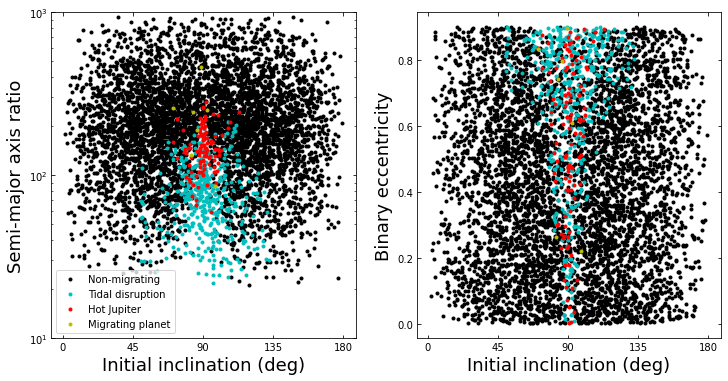

In [5]:
fs = 18
plt.figure(2,figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(df_nm.Imut_input*rad2deg,df_nm.a2_input/df_nm.a1_input,'k.',label='Non-migrating')
plt.plot(df_td.Imut_input*rad2deg,df_td.a2_input/df_td.a1_input,'c.',label='Tidal disruption')
plt.plot(df_hj.Imut_input*rad2deg,df_hj.a2_input/df_hj.a1_input,'r.',label='Hot Jupiter')
plt.plot(df_mg.Imut_input*rad2deg,df_mg.a2_input/df_mg.a1_input,'y.',label='Migrating planet')
plt.xticks([0,45,90,135,180])
plt.yscale('log')
plt.xlabel(r'Initial inclination (deg)',fontsize=fs)
plt.ylabel(r'Semi-major axis ratio',fontsize=fs)
plt.ylim(10,1000)
plt.legend(loc=3)

plt.subplot(1,2,2)
plt.plot(df_nm.Imut_input*rad2deg,df_nm.e2_input,'k.')
plt.plot(df_td.Imut_input*rad2deg,df_td.e2_input,'c.')
plt.plot(df_hj.Imut_input*rad2deg,df_hj.e2_input,'r.')
plt.plot(df_mg.Imut_input*rad2deg,df_mg.e2_input,'y.')
plt.xticks([0,45,90,135,180])
plt.xlabel(r'Initial inclination (deg)',fontsize=fs)
plt.ylabel(r'Binary eccentricity',fontsize=fs)

In addition to these properties, many other properties are available for analysis in the output file `population_synthesis.csv`.